In [5]:
import json
import pandas as pd

# Load your dataset
with open("Copy of response.json") as f:
    data = json.load(f)

# Extract NDVI (example)
print("Keys in data['modis']['raw_data']['data']['MOD13Q1']:", data["modis"]["raw_data"]["data"]["MOD13Q1"].keys())
# Corrected path to access the list of band data
subset = data["modis"]["raw_data"]["data"]["MOD13Q1"]["data"]["subset"]

records = []
for band_data in subset:
    date = band_data["calendar_date"]
    band = band_data["band"]

    for value in band_data["data"]:
        records.append({
            "date": date,
            "band": band,
            "value": value
        })

df = pd.DataFrame(records)
print(df.head())

Keys in data['modis']['raw_data']['data']['MOD13Q1']: dict_keys(['description', 'data', 'retrieved_at', 'endpoint_used'])
         date                           band  value
0  2025-06-26  250m_16_days_blue_reflectance    958
1  2025-06-26  250m_16_days_blue_reflectance    947
2  2025-06-26  250m_16_days_blue_reflectance    947
3  2025-06-26  250m_16_days_blue_reflectance    866
4  2025-06-26  250m_16_days_blue_reflectance    866


In [6]:
df["value_cat"] = pd.qcut(df["value"], q=4, labels=["Low","Medium","High","Very High"])


In [7]:
df["NDVI_class"] = pd.cut(df["value"], bins=[0,1000,2000,3000,4000],
                          labels=["Poor","Moderate","Good","Excellent"])


In [12]:
!pip install CHAID
from CHAID import Tree

# Prepare dataset
X = df[["value_cat"]]
y = df["NDVI_class"]

# Fit CHAID model
tree = Tree.from_pandas_df(df, {'value_cat': 'nominal'}, "NDVI_class")

tree.print_tree()

([], {'Poor': np.float64(1024.0), 'Good': np.float64(506.0), 'Moderate': np.float64(882.0), 'Excellent': np.float64(264.0), '<missing>': np.float64(240.0)}, (value_cat, p=0.0, score=3796.0593099476655, groups=[['High'], ['Low'], ['Medium'], ['Very High']]), dof=12))
|-- (['High'], {'Poor': 0, 'Good': np.float64(228.0), 'Moderate': np.float64(511.0), 'Excellent': 0, '<missing>': 0}, <Invalid Chaid Split> - the node only contains single category respondents)
|-- (['Low'], {'Poor': np.float64(665.0), 'Good': 0, 'Moderate': 0, 'Excellent': 0, '<missing>': np.float64(64.0)}, <Invalid Chaid Split> - the node only contains single category respondents)
|-- (['Medium'], {'Poor': np.float64(359.0), 'Good': 0, 'Moderate': np.float64(371.0), 'Excellent': 0, '<missing>': 0}, <Invalid Chaid Split> - the node only contains single category respondents)
+-- (['Very High'], {'Poor': 0, 'Good': np.float64(278.0), 'Moderate': 0, 'Excellent': np.float64(264.0), '<missing>': np.float64(176.0)}, <Invalid Cha

In [13]:
tree.print_tree()


([], {'Poor': np.float64(1024.0), 'Good': np.float64(506.0), 'Moderate': np.float64(882.0), 'Excellent': np.float64(264.0), '<missing>': np.float64(240.0)}, (value_cat, p=0.0, score=3796.0593099476655, groups=[['High'], ['Low'], ['Medium'], ['Very High']]), dof=12))
|-- (['High'], {'Poor': 0, 'Good': np.float64(228.0), 'Moderate': np.float64(511.0), 'Excellent': 0, '<missing>': 0}, <Invalid Chaid Split> - the node only contains single category respondents)
|-- (['Low'], {'Poor': np.float64(665.0), 'Good': 0, 'Moderate': 0, 'Excellent': 0, '<missing>': np.float64(64.0)}, <Invalid Chaid Split> - the node only contains single category respondents)
|-- (['Medium'], {'Poor': np.float64(359.0), 'Good': 0, 'Moderate': np.float64(371.0), 'Excellent': 0, '<missing>': 0}, <Invalid Chaid Split> - the node only contains single category respondents)
+-- (['Very High'], {'Poor': 0, 'Good': np.float64(278.0), 'Moderate': 0, 'Excellent': np.float64(264.0), '<missing>': np.float64(176.0)}, <Invalid Cha

In [15]:
!apt-get install graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [22]:
dir(tree)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_stats',
 '_tree_store',
 'accuracy',
 'build_tree',
 'classification_rules',
 'data_size',
 'from_numpy',
 'from_pandas_df',
 'generate_best_split',
 'get_node',
 'max_depth',
 'min_parent_node_size',
 'model_predictions',
 'node',
 'node_count',
 'node_predictions',
 'observed',
 'print_tree',
 'render',
 'risk',
 'to_tree',
 'tree_store',
 'vectorised_array']

In [23]:
print(tree)


[([], {'Poor': np.float64(1024.0), 'Good': np.float64(506.0), 'Moderate': np.float64(882.0), 'Excellent': np.float64(264.0), '<missing>': np.float64(240.0)}, (value_cat, p=0.0, score=3796.0593099476655, groups=[['High'], ['Low'], ['Medium'], ['Very High']]), dof=12)), (['High'], {'Poor': 0, 'Good': np.float64(228.0), 'Moderate': np.float64(511.0), 'Excellent': 0, '<missing>': 0}, <Invalid Chaid Split> - the node only contains single category respondents), (['Low'], {'Poor': np.float64(665.0), 'Good': 0, 'Moderate': 0, 'Excellent': 0, '<missing>': np.float64(64.0)}, <Invalid Chaid Split> - the node only contains single category respondents), (['Medium'], {'Poor': np.float64(359.0), 'Good': 0, 'Moderate': np.float64(371.0), 'Excellent': 0, '<missing>': 0}, <Invalid Chaid Split> - the node only contains single category respondents), (['Very High'], {'Poor': 0, 'Good': np.float64(278.0), 'Moderate': 0, 'Excellent': np.float64(264.0), '<missing>': np.float64(176.0)}, <Invalid Chaid Split> -

In [25]:
tree.print_tree()


([], {'Poor': np.float64(1024.0), 'Good': np.float64(506.0), 'Moderate': np.float64(882.0), 'Excellent': np.float64(264.0), '<missing>': np.float64(240.0)}, (value_cat, p=0.0, score=3796.0593099476655, groups=[['High'], ['Low'], ['Medium'], ['Very High']]), dof=12))
|-- (['High'], {'Poor': 0, 'Good': np.float64(228.0), 'Moderate': np.float64(511.0), 'Excellent': 0, '<missing>': 0}, <Invalid Chaid Split> - the node only contains single category respondents)
|-- (['Low'], {'Poor': np.float64(665.0), 'Good': 0, 'Moderate': 0, 'Excellent': 0, '<missing>': np.float64(64.0)}, <Invalid Chaid Split> - the node only contains single category respondents)
|-- (['Medium'], {'Poor': np.float64(359.0), 'Good': 0, 'Moderate': np.float64(371.0), 'Excellent': 0, '<missing>': 0}, <Invalid Chaid Split> - the node only contains single category respondents)
+-- (['Very High'], {'Poor': 0, 'Good': np.float64(278.0), 'Moderate': 0, 'Excellent': np.float64(264.0), '<missing>': np.float64(176.0)}, <Invalid Cha

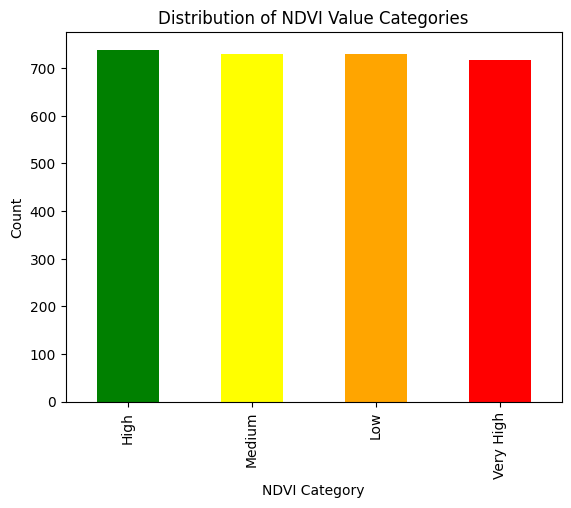

In [26]:
import matplotlib.pyplot as plt

df['value_cat'].value_counts().plot(kind='bar', color=['green','yellow','orange','red'])
plt.title("Distribution of NDVI Value Categories")
plt.xlabel("NDVI Category")
plt.ylabel("Count")
plt.show()


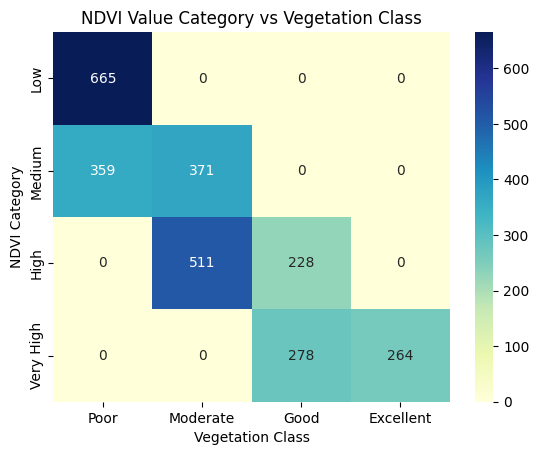

In [27]:
import seaborn as sns

ct = pd.crosstab(df['value_cat'], df['NDVI_class'])

sns.heatmap(ct, annot=True, cmap="YlGnBu", fmt="d")
plt.title("NDVI Value Category vs Vegetation Class")
plt.xlabel("Vegetation Class")
plt.ylabel("NDVI Category")
plt.show()


In [28]:
dot = """
digraph CHAID {
    node [shape=box, style=filled, color=lightgray];

    root [label="Split: value_cat"];
    high  [label="High\n→ Leaf"];
    low   [label="Low\n→ Leaf"];
    med   [label="Medium\n→ Leaf"];
    vhigh [label="Very High\n→ Leaf"];

    root -> high [label="High"];
    root -> low  [label="Low"];
    root -> med  [label="Medium"];
    root -> vhigh [label="Very High"];
}
"""

with open("chaid_tree.dot", "w") as f:
    f.write(dot)


In [29]:
!dot -Tpng chaid_tree.dot -o chaid_tree.png


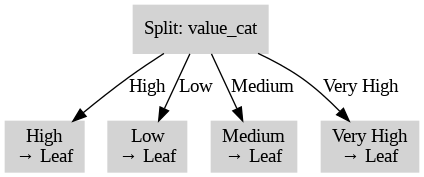

In [30]:
from IPython.display import Image
Image(filename="chaid_tree.png")
